<center><font color="blue" size="+10" face="Disney" style="font-weight: bold;">Rental Bike Sharing</font></center>

# **Abstracto**

Los sistemas de bicicletas compartidas son una nueva generación de alquileres de bicicletas tradicionales en los que todo el proceso, desde la afiliación, el alquiler y la devolución, se ha vuelto automático. A través de estos sistemas, el usuario puede alquilar fácilmente una bicicleta desde una posición particular y regresar en otra posición. Actualmente, hay alrededor de 500 programas de bicicletas compartidas en todo el mundo que se componen de más de 500 mil bicicletas. Hoy en día, existe un gran interés en estos sistemas debido a su importante papel en cuestiones de tráfico, medio ambiente y salud.

Aparte de las interesantes aplicaciones del mundo real de los sistemas de bicicletas compartidas, las características de los datos generados por estos sistemas los hacen atractivos para la investigación. A diferencia de otros servicios de transporte como el autobús o el metro, en estos sistemas se registra explícitamente la duración del viaje, la posición de salida y de llegada. Esta función convierte el sistema de bicicletas compartidas en una red de sensores virtual que se puede utilizar para detectar la movilidad en la ciudad. Por lo tanto, se espera que la mayoría de los eventos importantes en la ciudad puedan detectarse a través del monitoreo de estos datos.

# **Contexto Comercial**
El dueño de una compañia de alquiler de bicicletas necesita optimizar la cantidad de bicicletas que pondrá a disposión (momentos de mayor demanda) y quiere conocer cuales son los mejores momentos para retirar bicicletas de circulación para su reparación (momentos de menor demanda). Con este objetivo, hemos sido contratados

Las bicicletas estan a disposición de los usuarios las 24 horas del día, los 7 días de la semana.

El sistema de alquiler registra la hora y dia de retiro, detallando si el cliente es habitual o casual

# **Problema comercial**

La tarea es encontrar patrones en el alquiler de las bicicletas, para detectar los momentos de mayor y menor demanda

Para eso nos preguntamos:

- ¿el clima afecta el alquiler de bicicletas?
- ¿cuales son las horas picos de alquiler?
- ¿cuales son los días de mas alquiler?
- ¿hay meses con mayor alquiler?
- ¿como se comporta el alquiler año tras año?


# **Contexto analitico**

La compañia nos brinda la información de 2 años de alquiler (2011 y 2012), detallada día por día, abierto en 24 horas. 
La información tambien incluye el estado del clima ( http://www.freemeteo.com) y el calendario de los dias feriados (http://dchr.dc.gov/page/holiday-schedule)


Nos facilita el manual del sistema donde detalla los campos:

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
-atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
-hum: Normalized humidity. The values are divided to 100 (max)
-windspeed: Normalized wind speed. The values are divided to 67 (max)
-casual: count of casual users
-registered: count of registered users
-cnt: count of total rental bikes including both casual and registered

# **Analisis exploratorio de datos (EDA)**


## Carga de datos

Fuente: https://www.kaggle.com/datasets/imakash3011/rental-bike-sharing

In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt


drive.mount ('/content/drive')
%cd "/content/drive/MyDrive/Coderhouse/Practicas integradoras/2da entrega"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coderhouse/Practicas integradoras/2da entrega


In [2]:
df = pd.read_csv ('Bicicletas por hora.csv',sep = ",")
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df.shape

(17379, 17)

In [4]:
mlp.rcParams.update({'axes.titlesize': 'large', 'axes.titlecolor': 'blue'}) #parametros generales para todos los graficos
sns.set_style("darkgrid")

## Primeras impresiones

### Valores nulos

In [5]:
df.info() #No hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Registros faltantes

Los datos corresponden al alquiler de bicicletas de 2 años (2011 y 2012), abierto en las 24 horas del día

In [6]:
df.dteday.min(), df.dteday.max() #coincide con la descripcion de los datos

('2011-01-01', '2012-12-31')

In [7]:
df.hr.unique() #coincide con la descripción de los datos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [8]:
df.dteday.nunique() #cantidad de dias unicos

731

In [9]:
365 * 2 #cantidad total de dias

730

In [10]:
# el 2012 es año bisiesto

In [11]:
731 * 24 # cantidad de registro que deberia tener

17544

In [12]:
# faltan registros (total del dataset 17.379)

**Conclusión:** Estan todos los dias de los 2 años, pero hay dias que no tienen todas las horas

**¿Que horas faltan?**

sabiendo que hay 731 dias, cada hora se deberia repetir esa cantidad de veces

In [13]:
qhoras = -df.groupby(['hr'])['hr'].count()+731
qhoras.sum()

165

In [14]:
17544 - 17379 #ok, suma igual que los registros faltantes

165

In [15]:
dfqhoras = pd.DataFrame ({"hora": range(24),"faltante":qhoras})

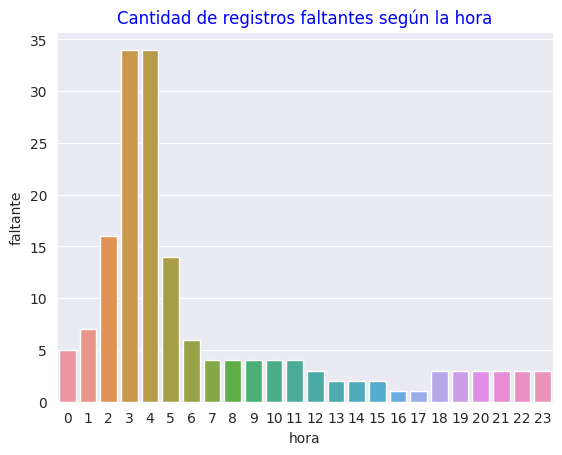

In [16]:
sns.barplot(data= dfqhoras, x= "hora",y = "faltante").set(title = "Cantidad de registros faltantes según la hora")
plt.show()

**Conclusión:** Entre las 0 y las 6 de la mañana se encuentran la mayor cantidad de registros faltantes. Suena logico que no se hayan alquilado bicicletas en ese horario

<font color="red" size="+2" face="Disney" style="font-weight: bold;">Atención: La hora del día afecta a la variable objetivo</font>


**¿Hay días con pocas horas?**

In [17]:
dias_horas = df.groupby(['dteday'])['hr'].count()
dias_horas[dias_horas < 24].shape

(76,)

Hay 76 dias que le faltan horas. Lo "normal" serian entre 2 o 3 (maximo 6 horas, teniendo en cuenta que desde las 0 a las 6 am hay poco movimiento)

In [18]:
dias_horas[dias_horas <= 17]

dteday
2011-01-18    12
2011-01-26    16
2011-01-27     8
2011-08-28    17
2012-10-29     1
2012-10-30    11
Name: hr, dtype: int64

**¿Que pasó esos dias?**

Fuente: Google

- **2011-01-18, 2011-01-26 y 2011-01-27:** The Carmageddon Snowstorm
- **2011-08-28:** Huracan Irene
- **2012-10-29, 2012-10-30:** huracan Sandy
    


Tomando como "normal" que falten 6 horas en el dia (franja entre las 0 horas a las 6), el resto de los dias se comportarian normalmente


<font color="red" size="+2" face="Disney" style="font-weight: bold;">Atención: Los climas extremos afectan a la variable objetivo</font>

**Conclusiones finales:**

1) El dataset parece estar completo. Las horas que faltan suena logico que no tengan movimiento (sea por climas extremos u horarios nocturnos)

2) No hay valores nulos

3) No hay registros duplicados

## Modificación del dataset

### Eliminación de columnas

#### Indice: instant

In [19]:
del df["instant"] 

### Modificación de columnas numericas a categoricas

#### Año: yr

In [20]:
# ¿Que valores tiene?

df.yr.unique()

array([0, 1])

In [21]:
# Segun el primer head, 0 es 2011
df["yr"] = df["yr"].replace({0: "año 2011", 1: "año 2012"}) 

#### Estación de año: season

In [22]:
# ¿Que valores tiene?
df.season.unique()

array([1, 2, 3, 4])

In [23]:
# Segun el manual, 1 = invierno, 2= primavera,3= Verano y 4= Otoño
df["season"] = df["season"].replace({1:"invierno",2:"primavera",3:"verano",4:"otoño"}) #estaciones del año

#### Feriados: Holiday


In [24]:
# ¿que valores tiene?
df.holiday.unique()


array([0, 1])

In [25]:
# ¿cual sera feriado de esos valores?
print(df.holiday[df.holiday == 0].count())
print(df.holiday[df.holiday == 1].count())


16879
500


por logica, el valor mayor son los dias habiles. 

500 registros / 24 horas / 2 años = 10 feriados por año

es una cuenta simplificada porque estoy suponiendo que los dias feriados tiene 24 horas completas. Es solo para evaluar la razonabilidad del valor

In [26]:
df["holiday"] =df["holiday"].replace({0:"no",1:"si"})

#### Dia de semana(laboral): workingday

In [27]:
# ¿que valores tiene?
df.workingday.unique()

array([0, 1])

In [28]:
# ¿que valor representa dia laboral y cual fin de semana?
print(df.workingday[df.workingday == 0].count())
print(df.workingday[df.workingday == 1].count())

5514
11865


por logica, el mayor valor es el dia laboral

Prueba global: 

(5 dias laborables por semana X 4 semanas por mes X 12 meses X 2 años) - 20 (10 feriados por año) X 24

In [29]:
((5*4*12*2)-20)*24   #es razonable como prueba global

11040

In [30]:
df["workingday"] = df["workingday"].replace ({0:"no",1:"si"})

Tipo de Clima: weathersit

In [31]:
# ¿que valores tiene?
df.weathersit.unique()

array([1, 2, 3, 4])

Segun la fuente de datos, los valores representan:

1: Clear, Few clouds, Partly cloudy, Partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

a fin de simplificar, reemplazo los valores de la siguiente manera: 1 = Excelente 2 = Bueno 3 = Regular 4 = Malo

In [32]:
df["weathersit"] =df["weathersit"].replace ({1:"excelente",2:"bueno",3:"regular",4:"malo"})

In [33]:
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,invierno,año 2011,1,0,no,6,no,excelente,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,invierno,año 2011,1,1,no,6,no,excelente,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,invierno,año 2011,1,2,no,6,no,excelente,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,invierno,año 2011,1,3,no,6,no,excelente,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,invierno,año 2011,1,4,no,6,no,excelente,0.24,0.2879,0.75,0.0,0,1,1


### Columnas agregadas

#### Categoria de alquileres: catcnt

El objetivo es agrupar los alquileres en diversas categorias:

- 1 a 100
- 101 a 200 
- 201 a 300
- mayores a 300

In [34]:
def asignar_rango(cnt):
    if cnt > 0 and cnt <= 100:
        return 'entre 1 y 100'
    elif cnt > 100 and cnt <= 200:
        return 'entre 100 y 200'
    elif cnt > 200 and cnt <= 300:
        return 'entre 200 y 300'
    else:
        return 'mayor a 300'

In [35]:
df['catcnt'] = df['cnt'].apply(asignar_rango)

In [36]:
df.catcnt.value_counts() #cuenta registros de las categorias

entre 1 y 100      7035
mayor a 300        3891
entre 100 y 200    3749
entre 200 y 300    2704
Name: catcnt, dtype: int64

In [37]:
df.catcnt.value_counts(normalize=True)*100 #porcentaje de registros de cada categoria

entre 1 y 100      40.479890
mayor a 300        22.389090
entre 100 y 200    21.572012
entre 200 y 300    15.559008
Name: catcnt, dtype: float64

In [38]:
df.groupby(['catcnt'])["cnt"].sum() #cantidad de alquieleres dentro de cada categoria

catcnt
entre 1 y 100       250914
entre 100 y 200     556623
entre 200 y 300     665939
mayor a 300        1819203
Name: cnt, dtype: int64

In [39]:
# control
250914+556623+665939+1819203-df.cnt.sum()

0

In [40]:
df.groupby(['catcnt'])["cnt"].sum()/df["cnt"].sum()*100 #que porcentaje tiene cada categoria segun la suma alquileres

catcnt
entre 1 y 100       7.620360
entre 100 y 200    16.904867
entre 200 y 300    20.224838
mayor a 300        55.249935
Name: cnt, dtype: float64

#### Dia de la semana (en letras):dia_sem_letra

In [41]:
df["dia_sem_letra"] = df["weekday"]
df.dia_sem_letra = df.dia_sem_letra.replace({0: "dom", 1: "lun",2:"mar",3:"mie",4:"jue",5:"vie",6:"sab"})

In [42]:
df.dia_sem_letra[(df['workingday'] == 'no')].unique()  #dias no laborables deberian ser sabados y domingos. ¿que pasa con los feriados?

array(['sab', 'dom', 'lun', 'vie', 'jue', 'mie', 'mar'], dtype=object)

In [43]:
df.dia_sem_letra[(df['workingday'] == 'no') & (df['holiday'] == 'no')].unique()  # workingday incluye a los feriados entonces

array(['sab', 'dom'], dtype=object)

## Columnas normalizadas

### Temperatura

In [44]:
# la temperatura (temp) esta normalizada
#(t-tmin)/(tmax-tmin), tmin=-8, t_max=+39


df["temperatura"] = df["temp"]*47 -8

 

### Sensación termica

In [45]:
#(t-tmin)/(tmax-tmin), tmin=-16, t_max=+50
df["st"] = df["atemp"] * 66 -16

### Viento

In [46]:
df["viento"] = df["windspeed"]*67

## Datos Finales

In [47]:
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,catcnt,dia_sem_letra,temperatura,st,viento
0,2011-01-01,invierno,año 2011,1,0,no,6,no,excelente,0.24,...,0.81,0.0,3,13,16,entre 1 y 100,sab,3.28,3.0014,0.0
1,2011-01-01,invierno,año 2011,1,1,no,6,no,excelente,0.22,...,0.80,0.0,8,32,40,entre 1 y 100,sab,2.34,1.9982,0.0
2,2011-01-01,invierno,año 2011,1,2,no,6,no,excelente,0.22,...,0.80,0.0,5,27,32,entre 1 y 100,sab,2.34,1.9982,0.0
3,2011-01-01,invierno,año 2011,1,3,no,6,no,excelente,0.24,...,0.75,0.0,3,10,13,entre 1 y 100,sab,3.28,3.0014,0.0
4,2011-01-01,invierno,año 2011,1,4,no,6,no,excelente,0.24,...,0.75,0.0,0,1,1,entre 1 y 100,sab,3.28,3.0014,0.0


# Data wrangling


En primer lugar, voy a duplicar el dataframe

In [48]:
df_copia = df.copy()

In [49]:
## Variables numericas

numeric_data = df_copia.select_dtypes (include =np.number)
numeric_data.head()

,mnth,hr,weekday,temp,atemp,hum,windspeed,casual,registered,cnt,temperatura,st,viento
0,1,0,6,0.24,0.2879,0.81,0.0,3,13,16,3.28,3.0014,0.0
1,1,1,6,0.22,0.2727,0.80,0.0,8,32,40,2.34,1.9982,0.0
2,1,2,6,0.22,0.2727,0.80,0.0,5,27,32,2.34,1.9982,0.0
3,1,3,6,0.24,0.2879,0.75,0.0,3,10,13,3.28,3.0014,0.0
4,1,4,6,0.24,0.2879,0.75,0.0,0,1,1,3.28,3.0014,0.0


In [50]:
#de estas variables no me interesa analizar mnth, hr, weekday, temp (porque ya tengo el dato sin normalizar), atemp (idem), windspeed(idem)
numeric_data = numeric_data.drop(["mnth","hr","weekday","temp","atemp","windspeed"],axis = 1)

## Humedad

In [51]:
numeric_data.hum.describe()

count    17379.000000
mean         0.627229
std          0.192930
min          0.000000
25%          0.480000
50%          0.630000
75%          0.780000
max          1.000000
Name: hum, dtype: float64

la desviación estandar es relativamente cercana a la media

In [52]:
v = numeric_data.hum
serie_valores = pd.Series(data = v )
cantidad_valores= serie_valores.value_counts()
porcentaje_valores = cantidad_valores / len(v)*100
porcentaje_acumulado = porcentaje_valores.cumsum()
tabla = pd.DataFrame({'Cantidad': cantidad_valores,'Porcentaje': porcentaje_valores,'Porcentaje acumulado': porcentaje_acumulado})
tabla[tabla['Porcentaje acumulado']<50]

,Cantidad,Porcentaje,Porcentaje acumulado
0.88,657,3.780425,3.780425
0.83,630,3.625065,7.405489
0.94,560,3.222280,10.627769
0.87,488,2.807987,13.435756
0.70,430,2.474251,15.910006
0.66,388,2.232580,18.142586
0.65,387,2.226825,20.369411
0.69,359,2.065711,22.435123
0.55,352,2.025433,24.460556
0.74,341,1.962138,26.422694


In [53]:
tabla[tabla['Porcentaje acumulado']<50].count()

Cantidad                22
Porcentaje              22
Porcentaje acumulado    22
dtype: int64

In [54]:
tabla.count()

Cantidad                89
Porcentaje              89
Porcentaje acumulado    89
dtype: int64

La variable Humedad tiene 89 valores unicos. 22 de esos valores representan la mitad de los valores mas frecuentes, siendo 0.88 el valor que mas veces se repite

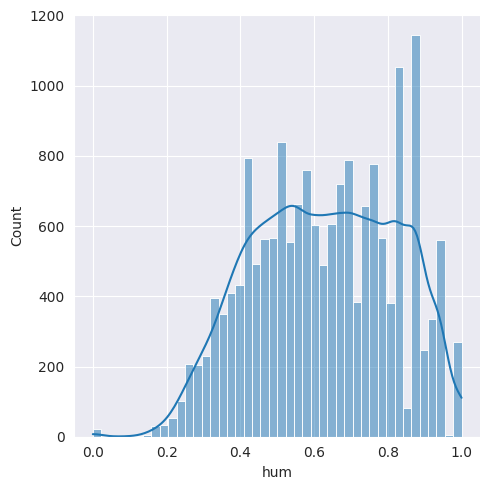

In [55]:

sns.displot(v, kde = True) #kde es para la linea

In [56]:
# en principio parece una curva normal. 
# calculo de la skew (entre -.5 y .5) y kurtosis (entre 2 y 4)
from scipy.stats import skew, kurtosis
print("Skew:",  -0.5 < skew(v) <0.5     , "  Kurtosis:",  2 < kurtosis(v,fisher = False)< 4)

Skew: True   Kurtosis: True


In [57]:
# Camino a seguir: Z_Score
from scipy import stats
z_score = np.abs(stats.zscore(v))
columna_z_score = v[z_score <2] #limite


In [58]:
limite_minimo_humedad = columna_z_score.min()
limite_maximo_humedad = columna_z_score.max()
limite_minimo_humedad,limite_maximo_humedad


(0.25, 1.0)

In [59]:
v[(v <limite_minimo_humedad)].count() + v[(v >limite_maximo_humedad)].count() # Los outliers representan 250 registros


250

## Temperatura

In [60]:
numeric_data.temperatura.describe()

count    17379.000000
mean        15.358397
std          9.050138
min         -7.060000
25%          7.980000
50%         15.500000
75%         23.020000
max         39.000000
Name: temperatura, dtype: float64

en primer lugar no se ven datos extraños. La temperatura (celcius) esta entre -7 y como maximo 39. 

La temperaturas promedio que registra washinton (supongiendo que los datos son de ahi) estan entre los 0 y 31 grados. Considero que los valores son aceptables.

la desviación estandar en este caso es mas lejana a la media (aunque tambien la amplitud entre el maximo y el minimo)

In [61]:
v = numeric_data.temperatura
serie_valores = pd.Series(data = v )
cantidad_valores= serie_valores.value_counts()
porcentaje_valores = cantidad_valores / len(v)*100
porcentaje_acumulado = porcentaje_valores.cumsum()
tabla = pd.DataFrame({'Cantidad': cantidad_valores,'Porcentaje': porcentaje_valores,'Porcentaje acumulado': porcentaje_acumulado})
tabla[tabla['Porcentaje acumulado']<50]

,Cantidad,Porcentaje,Porcentaje acumulado
21.14,726,4.177456,4.177456
23.02,693,3.987571,8.165027
22.08,692,3.981817,12.146844
24.90,690,3.970309,16.117153
20.20,675,3.883998,20.001151
8.92,671,3.860982,23.862132
7.98,645,3.711376,27.573508
6.10,641,3.688360,31.261868
10.80,614,3.533000,34.794867
7.04,611,3.515737,38.310605


In [62]:
tabla[tabla['Porcentaje acumulado']<50].count()

Cantidad                13
Porcentaje              13
Porcentaje acumulado    13
dtype: int64

In [63]:
tabla.count()

Cantidad                50
Porcentaje              50
Porcentaje acumulado    50
dtype: int64

La variable Temperatura tiene 50 valores unicos. 13 de esos valores representan la mitad de los valores mas frecuentes, siendo 21.14 el valor que mas veces se repite

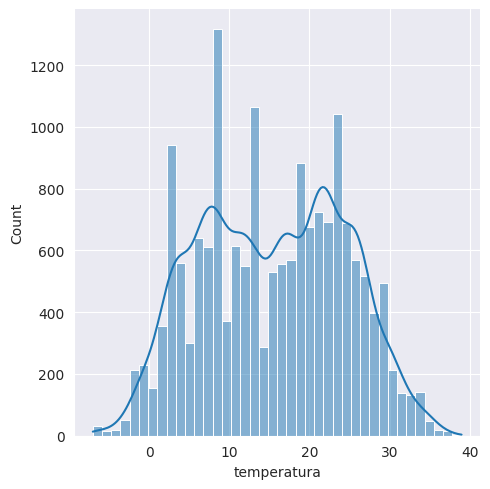

In [64]:
sns.displot(v, kde = True) #kde es para la linea

In [65]:
print("Skew:",  -0.5 < skew(v) <0.5     , "  Kurtosis:",  2 < kurtosis(v,fisher = False)< 4)

Skew: True   Kurtosis: True


In [66]:
# Camino a seguir: Z_Score

z_score = np.abs(stats.zscore(v))
columna_z_score = v[z_score <2] #limite


In [67]:
limite_minimo_temperatura = columna_z_score.min()
limite_maximo_temperatura = columna_z_score.max()
limite_minimo_temperatura,limite_maximo_temperatura  #estos valores ahora se parecen mas a la temperatura googleada de washintong


(-2.3600000000000003, 33.36)

In [68]:
v[(v <limite_minimo_temperatura)].count() + v[(v >limite_maximo_temperatura)].count() # Los outliers representan 291 registros

291

## Viento

In [69]:
numeric_data.viento.describe()

count    17379.000000
mean        12.736540
std          8.196795
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: viento, dtype: float64

la velociad promedio del viento en washintong es de 10 kilometros por hora (relativamente cerca al promedio del dataset). Como ya vimos anteriormente, hay momentos del año en donde hubo tornados. Eso infiere en el maximo y el promedio de los datos del viento

In [70]:
v = numeric_data.viento
serie_valores = pd.Series(data = v )
cantidad_valores= serie_valores.value_counts()
porcentaje_valores = cantidad_valores / len(v)*100
porcentaje_acumulado = porcentaje_valores.cumsum()
tabla = pd.DataFrame({'Cantidad': cantidad_valores,'Porcentaje': porcentaje_valores,'Porcentaje acumulado': porcentaje_acumulado})
tabla[tabla['Porcentaje acumulado']<50]

,Cantidad,Porcentaje,Porcentaje acumulado
0.0000,2180,12.543875,12.543875
8.9981,1738,10.000575,22.544450
11.0014,1695,9.753150,32.297601
12.9980,1657,9.534496,41.832096


In [71]:
tabla[tabla['Porcentaje acumulado']<50].count()

Cantidad                4
Porcentaje              4
Porcentaje acumulado    4
dtype: int64

In [72]:
tabla.count()

Cantidad                30
Porcentaje              30
Porcentaje acumulado    30
dtype: int64

La variable Viento tiene 30 valores unicos. 43 de esos valores representan la mitad de los valores mas frecuentes, siendo 0 el valor que mas veces se repite.

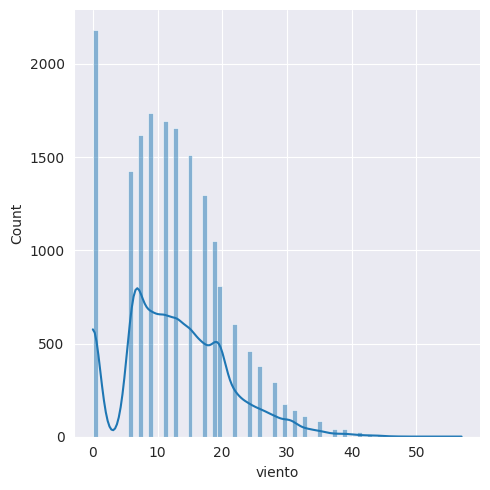

In [73]:
sns.displot(v, kde = True) #kde es para la linea

In [74]:
print("Skew:",  -0.5 < skew(v) <0.5     , "  Kurtosis:",  2 < kurtosis(v,fisher = False)< 4)

Skew: False   Kurtosis: True


<Axes: >

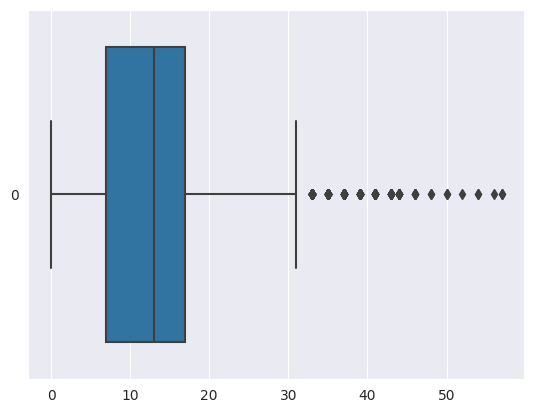

In [75]:
# Camino a seguir: Boxplot
sns.boxplot(v, orient = 'h')


los outliers son valores por encima de 30. Probablemente sean los dias de tormenta

In [76]:
Q1 = v.quantile(.25)
Q3 = v.quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR               
limite_superior = Q3 + 1.5 * IQR
limite_inferior,limite_superior

(-7.9930999999999965, 31.992499999999993)

In [77]:
 limite_inferior < v.min() # si es True me quedo con v.min


True

In [78]:
limite_superior > v.max() # si es True me quedo con v.max

False

In [79]:
limite_minimo_viento = v.min()
limite_maximo_viento = limite_superior
limite_minimo_viento, limite_maximo_viento

(0.0, 31.992499999999993)

Me hace ruido tantos valores con viento = 0

In [80]:
np.sort(numeric_data.viento.unique())

array([ 0.    ,  6.0032,  7.0015,  8.9981, 11.0014, 12.998 , 15.0013,
       16.9979, 19.0012, 19.9995, 22.0028, 23.9994, 26.0027, 27.9993,
       30.0026, 31.0009, 32.9975, 35.0008, 36.9974, 39.0007, 40.9973,
       43.0006, 43.9989, 46.0022, 47.9988, 50.0021, 51.9987, 54.002 ,
       55.9986, 56.9969])

In [81]:
prueba = pd.Series (np.sort(numeric_data.viento.unique()))
prueba.diff()

0        NaN
1     6.0032
2     0.9983
3     1.9966
4     2.0033
5     1.9966
6     2.0033
7     1.9966
8     2.0033
9     0.9983
10    2.0033
11    1.9966
12    2.0033
13    1.9966
14    2.0033
15    0.9983
16    1.9966
17    2.0033
18    1.9966
19    2.0033
20    1.9966
21    2.0033
22    0.9983
23    2.0033
24    1.9966
25    2.0033
26    1.9966
27    2.0033
28    1.9966
29    0.9983
dtype: float64

In [82]:
df.viento.value_counts(normalize=True).sort_values(ascending = False)*100

0.0000     12.543875
8.9981     10.000575
11.0014     9.753150
12.9980     9.534496
7.0015      9.304333
15.0013     8.705909
6.0032      8.199551
16.9979     7.451522
19.0012     6.030266
19.9995     4.649289
22.0028     3.463951
23.9994     2.646873
26.0027     2.192301
27.9993     1.703205
30.0026     1.012716
31.0009     0.840094
32.9975     0.644456
35.0008     0.483342
39.0007     0.253179
36.9974     0.224409
40.9973     0.132344
43.0006     0.080557
43.9989     0.063295
46.0022     0.028770
50.0021     0.011508
54.0020     0.011508
56.9969     0.011508
47.9988     0.011508
51.9987     0.005754
55.9986     0.005754
Name: viento, dtype: float64

de 0 salta a 6.... despues los saltos entre las mediciones son mucho menores pero....

dilema: Si elimino el viento = cero saco un 12% de los datos..... Voy a optar por reemplazarlo por la media

In [83]:
df_copia['viento'] = df_copia['viento'].replace(0,df_copia['viento'].mean())

In [84]:
df_copia['viento'].describe() #comprobacion del cambio

count    17379.000000
mean        14.334195
std          6.654700
min          6.003200
25%          8.998100
50%         12.998000
75%         16.997900
max         56.996900
Name: viento, dtype: float64

In [85]:
numeric_data['viento'].describe() # dato original

count    17379.000000
mean        12.736540
std          8.196795
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: viento, dtype: float64

entiendo que la media suba, porque reemplace el extremo inferior por la media, pero ¿por que la desviación estandar se aleja de la media?

## Sensación termica

In [86]:
numeric_data.st.describe()

count    17379.000000
mean        15.401157
std         11.342114
min        -16.000000
25%          5.997800
50%         15.996800
75%         24.999200
max         50.000000
Name: st, dtype: float64

la sensacion termica tiene valores mas extremos que la temperatura (-7 a 39)

la desviacion estantar esta cercana a la mediamas lejana a la media (aunque tambien la amplitud entre el maximo y el minimo)

In [87]:
v = numeric_data.st
serie_valores = pd.Series(data = v )
cantidad_valores= serie_valores.value_counts()
porcentaje_valores = cantidad_valores / len(v)*100
porcentaje_acumulado = porcentaje_valores.cumsum()
tabla = pd.DataFrame({'Cantidad': cantidad_valores,'Porcentaje': porcentaje_valores,'Porcentaje acumulado': porcentaje_acumulado})
tabla[tabla['Porcentaje acumulado']<50]

,Cantidad,Porcentaje,Porcentaje acumulado
24.9992,988,5.685022,5.685022
18.0032,618,3.556016,9.241038
11.0006,614,3.533000,12.774038
5.9978,600,3.452443,16.226480
28.0022,593,3.412164,19.638644
24.0026,588,3.383394,23.022038
18.9998,579,3.331607,26.353645
17.0000,575,3.308591,29.662236
13.9970,559,3.216526,32.878762
3.9980,549,3.158985,36.037747


In [88]:
tabla[tabla['Porcentaje acumulado']<50].count()

Cantidad                14
Porcentaje              14
Porcentaje acumulado    14
dtype: int64

In [89]:
tabla.count()

Cantidad                65
Porcentaje              65
Porcentaje acumulado    65
dtype: int64

La variable ST tiene 65 valores unicos. 14 de esos valores representan la mitad de los valores mas frecuentes, siendo 24.99 el valor que mas veces se repite.

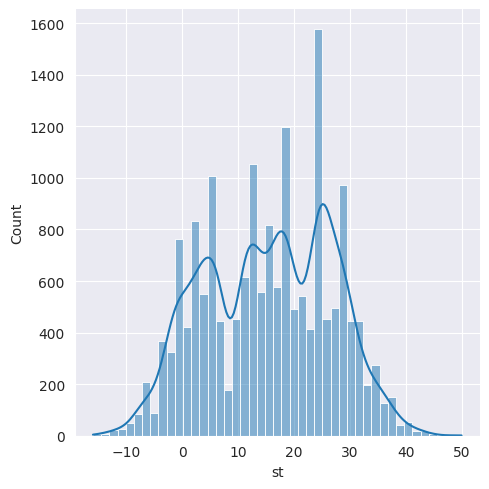

In [90]:
sns.displot(v, kde = True) #kde es para la linea

In [91]:
print("Skew:",  -0.5 < skew(v) <0.5     , "  Kurtosis:",  2 < kurtosis(v,fisher = False)< 4)

Skew: True   Kurtosis: True


In [92]:
# Camino a seguir: Z_Score

z_score = np.abs(stats.zscore(v))
columna_z_score = v[z_score <2] #limite


In [93]:
limite_minimo_st = columna_z_score.min()
limite_maximo_st = columna_z_score.max()
limite_minimo_st,limite_maximo_st  #los limites del z_score son mas razonables que los originales


(-6.9976, 38.001200000000004)

In [94]:
v[(v <limite_minimo_st)].count() + v[(v >limite_maximo_st)].count() # Los outliers representan 340 registros

340

## Alquileres


Siendo esta la variable objetivo, no le voy a aplicar ninguna limpieza. Sin embargo, analizare su comportamiento

<Axes: >

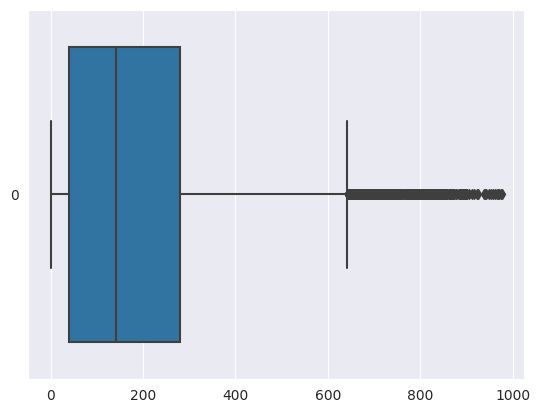

In [95]:
sns.boxplot(numeric_data.cnt, orient="h")

In [96]:
numeric_data.cnt.describe()


count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

- el minimo es 1, lo que es logico porque solo se registran alquileres
- la desviacion estandar esta cerca de la media
- el maximo esta muy alejado de la media, pero hay que analizar el comportamiento con las otras variables antes que nada

In [97]:
v = numeric_data.cnt
serie_valores = pd.Series(data = v )
cantidad_valores= serie_valores.value_counts()
porcentaje_valores = cantidad_valores / len(v)*100
porcentaje_acumulado = porcentaje_valores.cumsum()
tabla = pd.DataFrame({'Cantidad': cantidad_valores,'Porcentaje': porcentaje_valores,'Porcentaje acumulado': porcentaje_acumulado})
tabla[tabla['Porcentaje acumulado']<50]

,Cantidad,Porcentaje,Porcentaje acumulado
5,260,1.496058,1.496058
6,236,1.357961,2.854019
4,231,1.329190,4.183210
3,224,1.288912,5.472122
2,208,1.196847,6.668968
...,...,...,...
76,39,0.224409,49.093734
177,39,0.224409,49.318143
163,39,0.224409,49.542551
110,39,0.224409,49.766960


In [98]:
tabla[tabla['Porcentaje acumulado']<50].count()

Cantidad                136
Porcentaje              136
Porcentaje acumulado    136
dtype: int64

In [99]:
tabla.count()

Cantidad                869
Porcentaje              869
Porcentaje acumulado    869
dtype: int64

La variable cnt tiene 869 valores unicos. 136 de esos valores representan la mitad de los valores mas frecuentes, siendo 5 el valor que mas veces se repite.


## Dataset  final

In [100]:
#registro iniciales

a = df_copia.cnt.count()
a


17379

In [101]:
df_copia = df_copia[(df_copia.hum >=limite_minimo_humedad) & (df_copia.hum <limite_maximo_humedad) ]
b =  df_copia.cnt.count()
print("se eliminaron:", a-  b)

se eliminaron: 520


In [102]:
a = b
df_copia = df_copia[(df_copia.viento >=limite_minimo_viento) & (df_copia.viento <limite_maximo_viento) ]
b =  df_copia.cnt.count()
print("se eliminaron:", a-  b)

se eliminaron: 314


In [103]:
a = b
df_copia= df_copia[(df_copia.temperatura >=limite_minimo_temperatura) & (df_copia.temperatura <limite_maximo_temperatura) ]
b =  df_copia.cnt.count()
print("se eliminaron:", a-  b)

se eliminaron: 329


In [104]:
a = b
df_copia= df_copia[(df_copia.st >=limite_minimo_st) & (df_copia.st <limite_maximo_st) ]
b =  df_copia.cnt.count()
print("se eliminaron:", a-  b)

se eliminaron: 138


In [105]:
print("Total registros eliminados:",df.cnt.count() - df_copia.cnt.count(), "de" ,df.cnt.count())

Total registros eliminados: 1301 de 17379


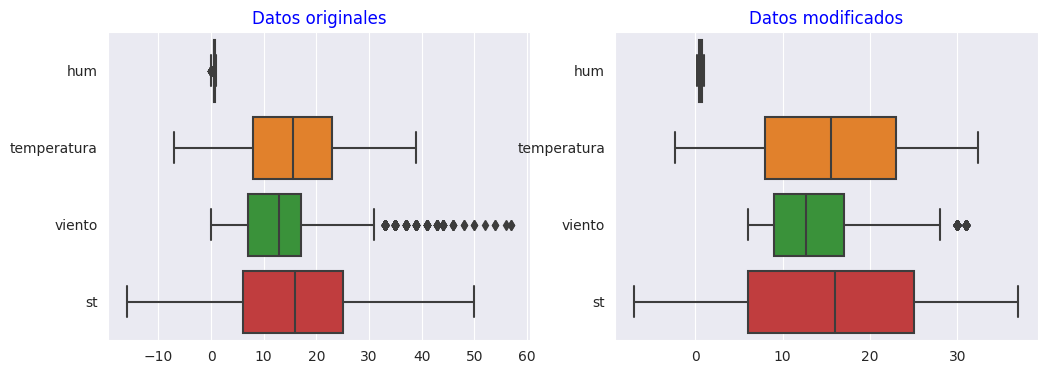

In [106]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
sns.boxplot(df[['hum','temperatura','viento','st']],orient='h',ax= axes[0])
sns.boxplot(df_copia[['hum','temperatura','viento','st']],orient='h',ax= axes[1])
axes[0].set_title('Datos originales')
axes[1].set_title('Datos modificados')

plt.show()


# Comportamiento del alquiler VS otras variables

## Vs Dia de la semana

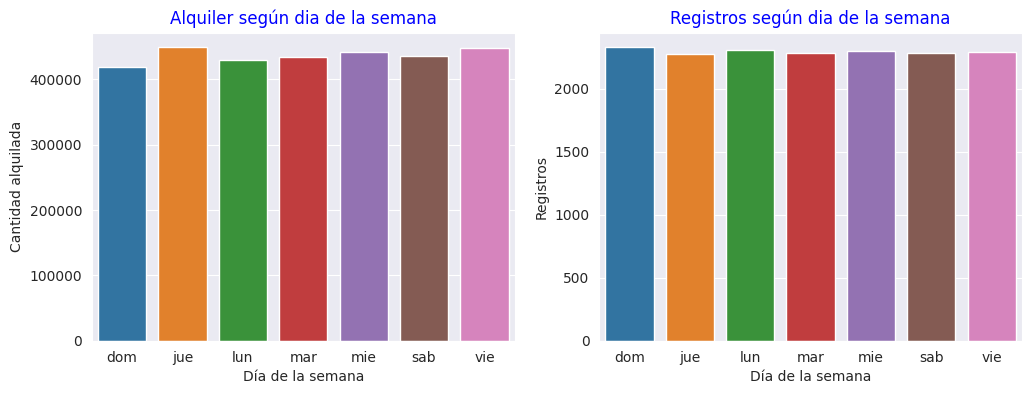

In [107]:
v = 'dia_sem_letra'
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
tempo = df_copia.groupby(v)[["cnt"]].sum().reset_index()
tempo2 = df_copia.groupby(v)[["cnt"]].count().reset_index()
ax = sns.barplot(tempo,x=v, y='cnt',ax= axes[0] )
ax1 = sns.barplot(tempo2,x=v, y='cnt',ax= axes[1] )
ax.set_title("Alquiler según dia de la semana")
ax.set_ylabel ("Cantidad alquilada")
ax.set_xlabel ("Día de la semana")
ax1.set_title("Registros según dia de la semana")
ax1.set_ylabel ("Registros")
ax1.set_xlabel ("Día de la semana")
plt.show()

**Conclusión**: Los alquileres son bastante constante en los diferentes dias de la semana. Los domingos es donde menos alquileres hay

Los registros tienen que tender a ser iguales ya que hay un registro por dia

## Vs mes del año

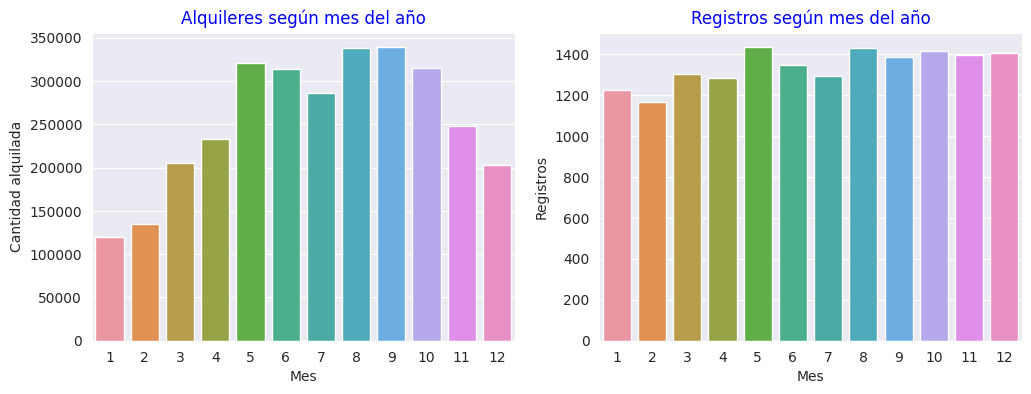

In [108]:
v = 'mnth'
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
tempo = df_copia.groupby(v)[["cnt"]].sum().reset_index()
tempo2 = df_copia.groupby(v)[["cnt"]].count().reset_index()
ax = sns.barplot(tempo,x=v, y='cnt',ax= axes[0] )
ax1 = sns.barplot(tempo2,x=v, y='cnt',ax= axes[1] )
ax.set_title("Alquileres según mes del año")
ax.set_ylabel ("Cantidad alquilada")
ax.set_xlabel ("Mes")
ax1.set_title("Registros según mes del año")
ax1.set_ylabel ("Registros")
ax1.set_xlabel ("Mes")
plt.show()

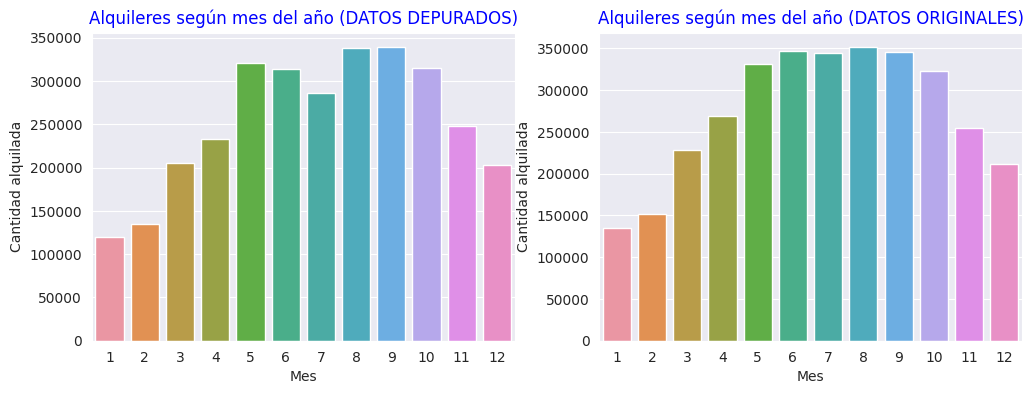

In [109]:
v = 'mnth'
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
tempo = df_copia.groupby(v)[["cnt"]].sum().reset_index()
tempo2 = df.groupby(v)[["cnt"]].sum().reset_index()
ax = sns.barplot(tempo,x=v, y='cnt',ax= axes[0] )
ax1 = sns.barplot(tempo2,x=v, y='cnt',ax= axes[1] )
ax.set_title("Alquileres según mes del año (DATOS DEPURADOS)")
ax.set_ylabel ("Cantidad alquilada")
ax.set_xlabel ("Mes")
ax1.set_title("Alquileres según mes del año (DATOS ORIGINALES)")
ax1.set_ylabel ("Cantidad alquilada")
ax1.set_xlabel ("Mes")
plt.show()

**Conclusión**: Se ve un incremento (minimo) desde los meses invernales (1 a 3), hasta llegar al verano (maximo). Luego, en otoño empiezan a bajar los alquileres

Respecto a los registros, es logico que hayan menos en invierno

Los meses 6 y 7 sufrieron cambios significativos con la limpieza de datos

## Vs Año


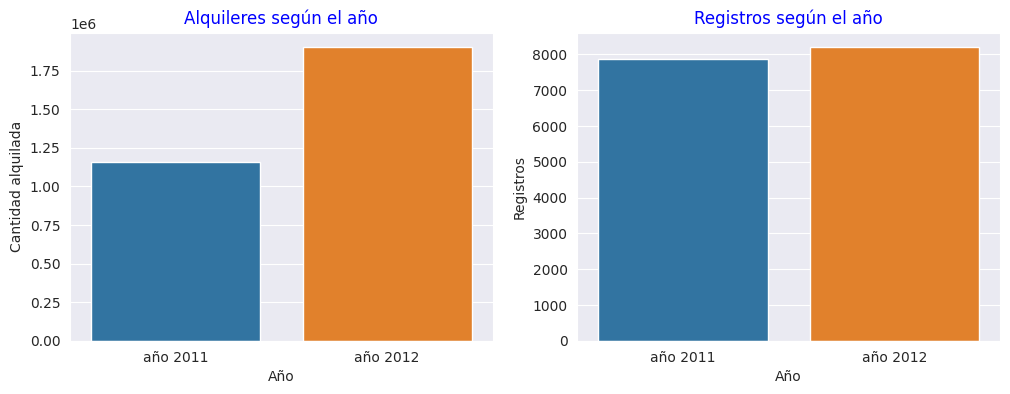

In [110]:
v = 'yr'
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
tempo = df_copia.groupby(v)[["cnt"]].sum().reset_index()
tempo2 = df_copia.groupby(v)[["cnt"]].count().reset_index()
ax = sns.barplot(tempo,x=v, y='cnt',ax= axes[0] )
ax1 = sns.barplot(tempo2,x=v, y='cnt',ax= axes[1] )
ax.set_title("Alquileres según el año")
ax.set_ylabel ("Cantidad alquilada")
ax.set_xlabel ("Año")
ax1.set_title("Registros según el año")
ax1.set_ylabel ("Registros")
ax1.set_xlabel ("Año")
plt.show()

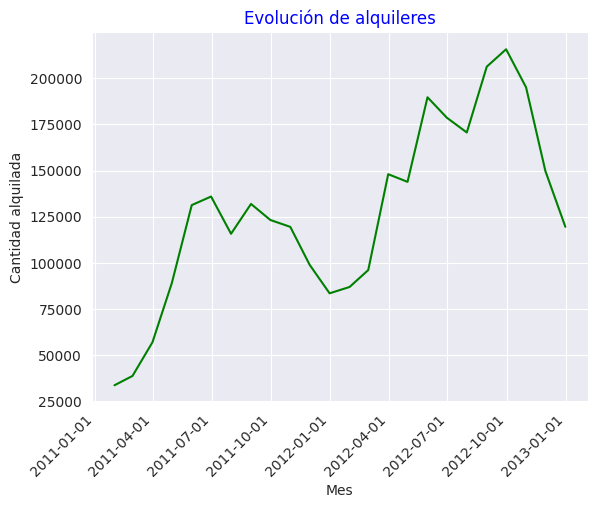

In [111]:

df_copia["dteday"]= pd.to_datetime(df_copia["dteday"])
tempo = df_copia.groupby(pd.Grouper(key="dteday",freq = 'M'))[["cnt"]].sum().reset_index()
ax = sns.lineplot(tempo,x='dteday',y='cnt', color = 'green')
ax.set_title("Evolución de alquileres", color = 'blue')
ax.set_ylabel ("Cantidad alquilada")
ax.set_xlabel ("Mes")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

**Conclusión:** El alquiler de bicicletas va aumentando con el pasar del tiempo. Las caidas responden a las estaciones invernales

## Vs Estaciones del año

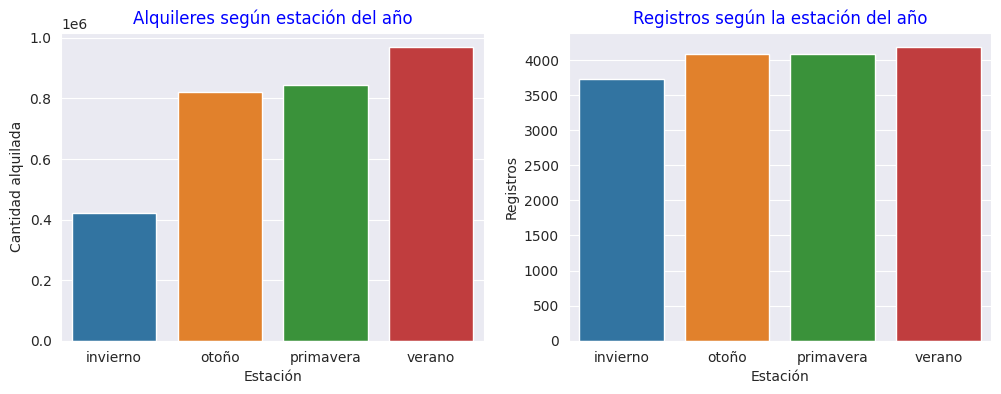

In [112]:
v = 'season'
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
tempo = df_copia.groupby(v)[["cnt"]].sum().reset_index()
tempo2 = df_copia.groupby(v)[["cnt"]].count().reset_index()
ax = sns.barplot(tempo,x=v, y='cnt',ax= axes[0] )
ax1 = sns.barplot(tempo2,x=v, y='cnt',ax= axes[1] )
ax.set_title("Alquileres según estación del año")
ax.set_ylabel ("Cantidad alquilada")
ax.set_xlabel ("Estación")
ax1.set_title("Registros según la estación del año")
ax1.set_ylabel ("Registros")
ax1.set_xlabel ("Estación")
plt.show()

**Conclusión**: De acuerdo a lo visto en los meses, el alquiler aumenta en las estaciones de primavera y verano.

Los registros responden al igual que los meses: hay menos registros en invierno

## Vs Temperatura

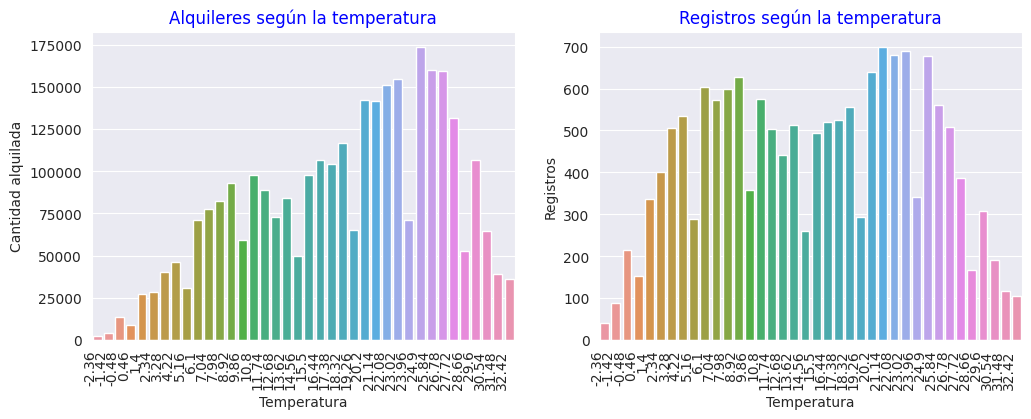

In [113]:
v = 'temperatura'
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
tempo = df_copia.groupby(v)[["cnt"]].sum().reset_index()
tempo2 = df_copia.groupby(v)[["cnt"]].count().reset_index()

tempo[v] = tempo[v].apply(lambda x: round(x, 2))
tempo2[v] = tempo2[v].apply(lambda x: round(x, 2))

ax = sns.barplot(tempo,x=v, y='cnt',ax= axes[0] )
ax1 = sns.barplot(tempo2,x=v, y='cnt',ax= axes[1] )
ax.set_title("Alquileres según la temperatura")
ax.set_ylabel ("Cantidad alquilada")
ax.set_xlabel ("Temperatura")
ax1.set_title("Registros según la temperatura")
ax1.set_ylabel ("Registros")
ax1.set_xlabel ("Temperatura")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax1.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

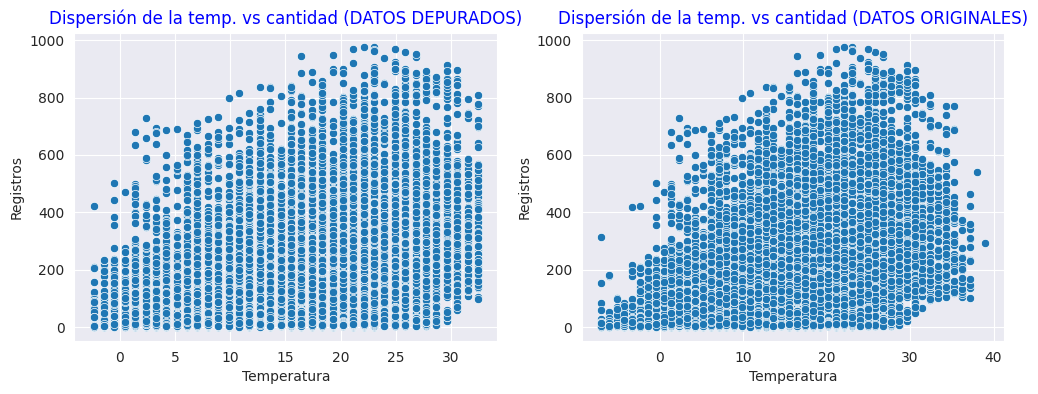

In [114]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
ax = sns.scatterplot(df_copia, x= v, y = 'cnt', ax =axes[0] )
ax.set_title("Dispersión de la temp. vs cantidad (DATOS DEPURADOS)")
ax.set_ylabel ("Registros")
ax.set_xlabel ("Temperatura")

ax1 = sns.scatterplot(df, x= v, y = 'cnt', ax =axes[1] )
ax1.set_title("Dispersión de la temp. vs cantidad (DATOS ORIGINALES)")
ax1.set_ylabel ("Registros")
ax1.set_xlabel ("Temperatura")

plt.show()

**Conclusión**: Se puede ver que a mas temperatura, mas alquileres, hasta que la temperatura supera los 30 grados, ahi el alquiler comienza a bajar.

Igualmente, deben existir otras variables que intectuan a la par de temperatura, porque se ven muchas subidas y bajadas.

La limpieza del dataset solo acorto los valores extremos

## Vs Sensación termica

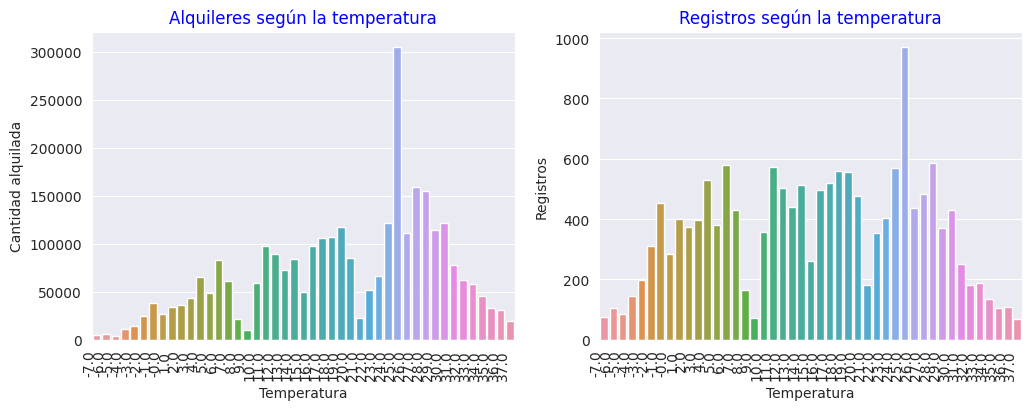

In [115]:
v = 'st'
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
tempo = df_copia.groupby(v)[["cnt"]].sum().reset_index()
tempo2 = df_copia.groupby(v)[["cnt"]].count().reset_index()

tempo[v] = tempo[v].apply(lambda x: round(x, 2))
tempo2[v] = tempo2[v].apply(lambda x: round(x, 2))

ax = sns.barplot(tempo,x=v, y='cnt',ax= axes[0] )
ax1 = sns.barplot(tempo2,x=v, y='cnt',ax= axes[1] )
ax.set_title("Alquileres según la temperatura")
ax.set_ylabel ("Cantidad alquilada")
ax.set_xlabel ("Temperatura")
ax1.set_title("Registros según la temperatura")
ax1.set_ylabel ("Registros")
ax1.set_xlabel ("Temperatura")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax1.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

**Conclusión**: Tiene el mismo comportamiento que la temperatura. Hay un valor que tiene un pico en los registros, y por lo tanto en la cantidad alquilada

## Vs Viento

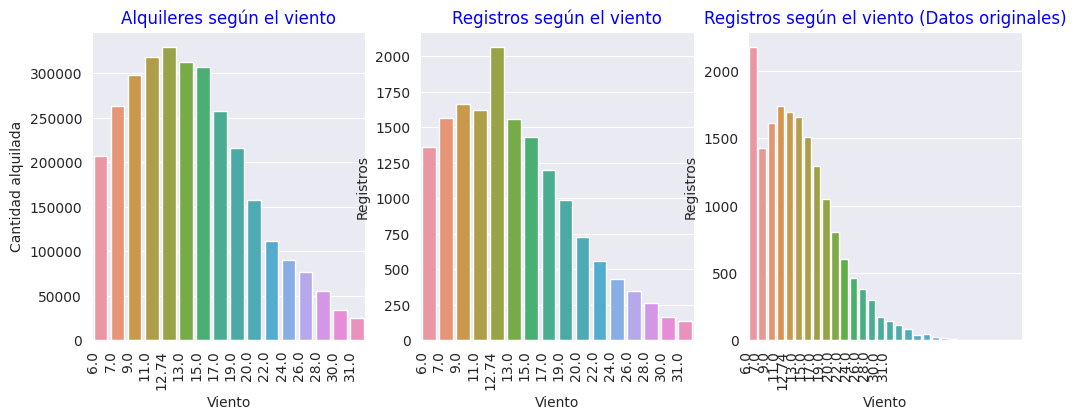

In [116]:
v = 'viento'
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
tempo = df_copia.groupby(v)[["cnt"]].sum().reset_index()
tempo2 = df_copia.groupby(v)[["cnt"]].count().reset_index()
tempo3 = df.groupby(v)[["cnt"]].count().reset_index()

tempo[v] = tempo[v].apply(lambda x: round(x, 2))
tempo2[v] = tempo2[v].apply(lambda x: round(x, 2))
tempo3[v] = tempo3[v].apply(lambda x: round(x, 2))

ax = sns.barplot(tempo,x=v, y='cnt',ax= axes[0] )
ax1 = sns.barplot(tempo2,x=v, y='cnt',ax= axes[1] )
ax2 = sns.barplot(tempo3,x=v, y='cnt',ax= axes[2] )

ax.set_title("Alquileres según el viento")
ax.set_ylabel ("Cantidad alquilada")
ax.set_xlabel ("Viento")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

ax1.set_title("Registros según el viento")
ax1.set_ylabel ("Registros")
ax1.set_xlabel ("Viento")
ax1.set_xticks(ax.get_xticks())
ax1.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


ax2.set_title("Registros según el viento (Datos originales)")
ax2.set_ylabel ("Registros")
ax2.set_xlabel ("Viento")
ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

**Conclusión**: 
- A mas viento, menos alquiler, excepto en los valores mas bajos, donde el viento no debe ser influyente sobre la variable alquiler
- el pico de registros en 12,74 se debe a modificar los valores de 0 a la media

## Vs Humedad

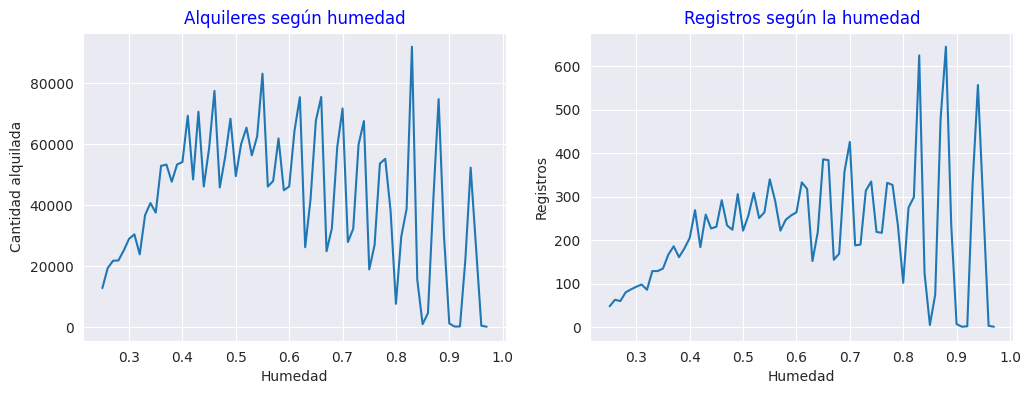

In [117]:
v = 'hum'
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

tempo = df_copia.groupby(v)[["cnt"]].sum().reset_index()
tempo2 = df_copia.groupby(v)[["cnt"]].count().reset_index()

ax = sns.lineplot(tempo,x=v, y='cnt',ax= axes[0] )
ax1 = sns.lineplot(tempo2,x=v, y='cnt',ax= axes[1] )
ax.set_title("Alquileres según humedad")
ax.set_ylabel ("Cantidad alquilada")
ax.set_xlabel ("Humedad")
ax1.set_title("Registros según la humedad")
ax1.set_ylabel ("Registros")
ax1.set_xlabel ("Humedad")

plt.show()

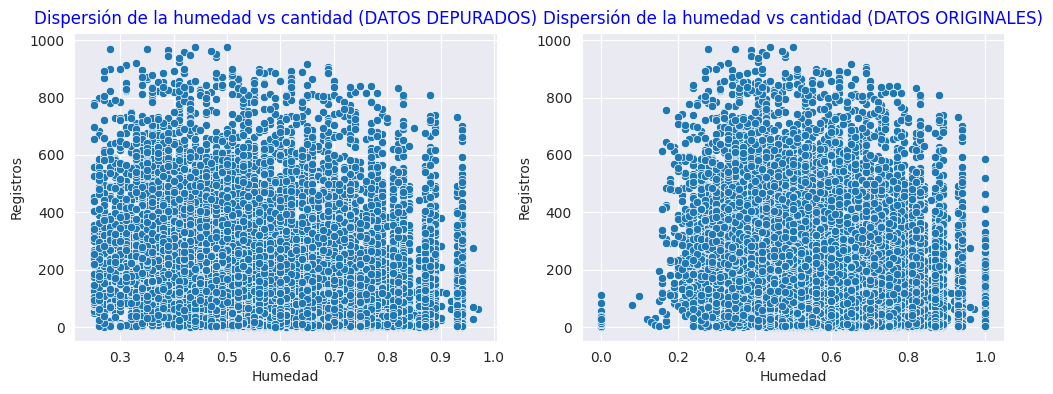

In [118]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
ax = sns.scatterplot(df_copia, x= v, y = 'cnt', ax =axes[0] )
ax.set_title("Dispersión de la humedad vs cantidad (DATOS DEPURADOS)")
ax.set_ylabel ("Registros")
ax.set_xlabel ("Humedad")

ax1 = sns.scatterplot(df, x= v, y = 'cnt', ax =axes[1] )
ax1.set_title("Dispersión de la humedad vs cantidad (DATOS ORIGINALES)")
ax1.set_ylabel ("Registros")
ax1.set_xlabel ("Humedad")

plt.show()

**Conclusión**: No se ve claramente una relacion directa con la cantidad

## Vs Horas

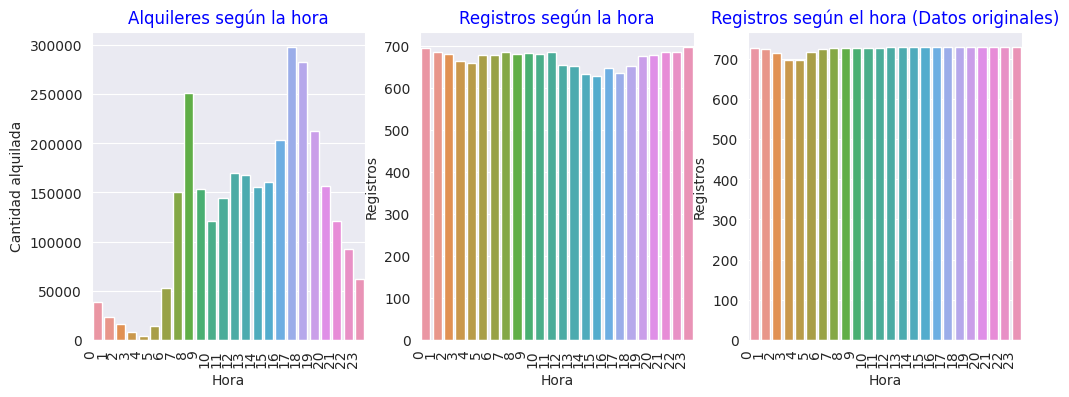

In [119]:
v = 'hr'
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
tempo = df_copia.groupby(v)[["cnt"]].sum().reset_index()
tempo2 = df_copia.groupby(v)[["cnt"]].count().reset_index()
tempo3 = df.groupby(v)[["cnt"]].count().reset_index()

tempo[v] = tempo[v].apply(lambda x: round(x, 2))
tempo2[v] = tempo2[v].apply(lambda x: round(x, 2))
tempo3[v] = tempo3[v].apply(lambda x: round(x, 2))

ax = sns.barplot(tempo,x=v, y='cnt',ax= axes[0] )
ax1 = sns.barplot(tempo2,x=v, y='cnt',ax= axes[1] )
ax2 = sns.barplot(tempo3,x=v, y='cnt',ax= axes[2] )

ax.set_title("Alquileres según la hora")
ax.set_ylabel ("Cantidad alquilada")
ax.set_xlabel ("Hora")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

ax1.set_title("Registros según la hora")
ax1.set_ylabel ("Registros")
ax1.set_xlabel ("Hora")
ax1.set_xticks(ax.get_xticks())
ax1.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


ax2.set_title("Registros según el hora (Datos originales)")
ax2.set_ylabel ("Registros")
ax2.set_xlabel ("Hora")
ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

Como se vio al principio, las horas con menor cantidad de alquiler (y registros en los datos originales) son entre las 0 y las 4

Se notan horas picos a las 8 y a las 18, que son posibles horarios de entrada y salida del trabajo. Hay que comprobar entonces, si todos los dias de la semana se comportan igualmente

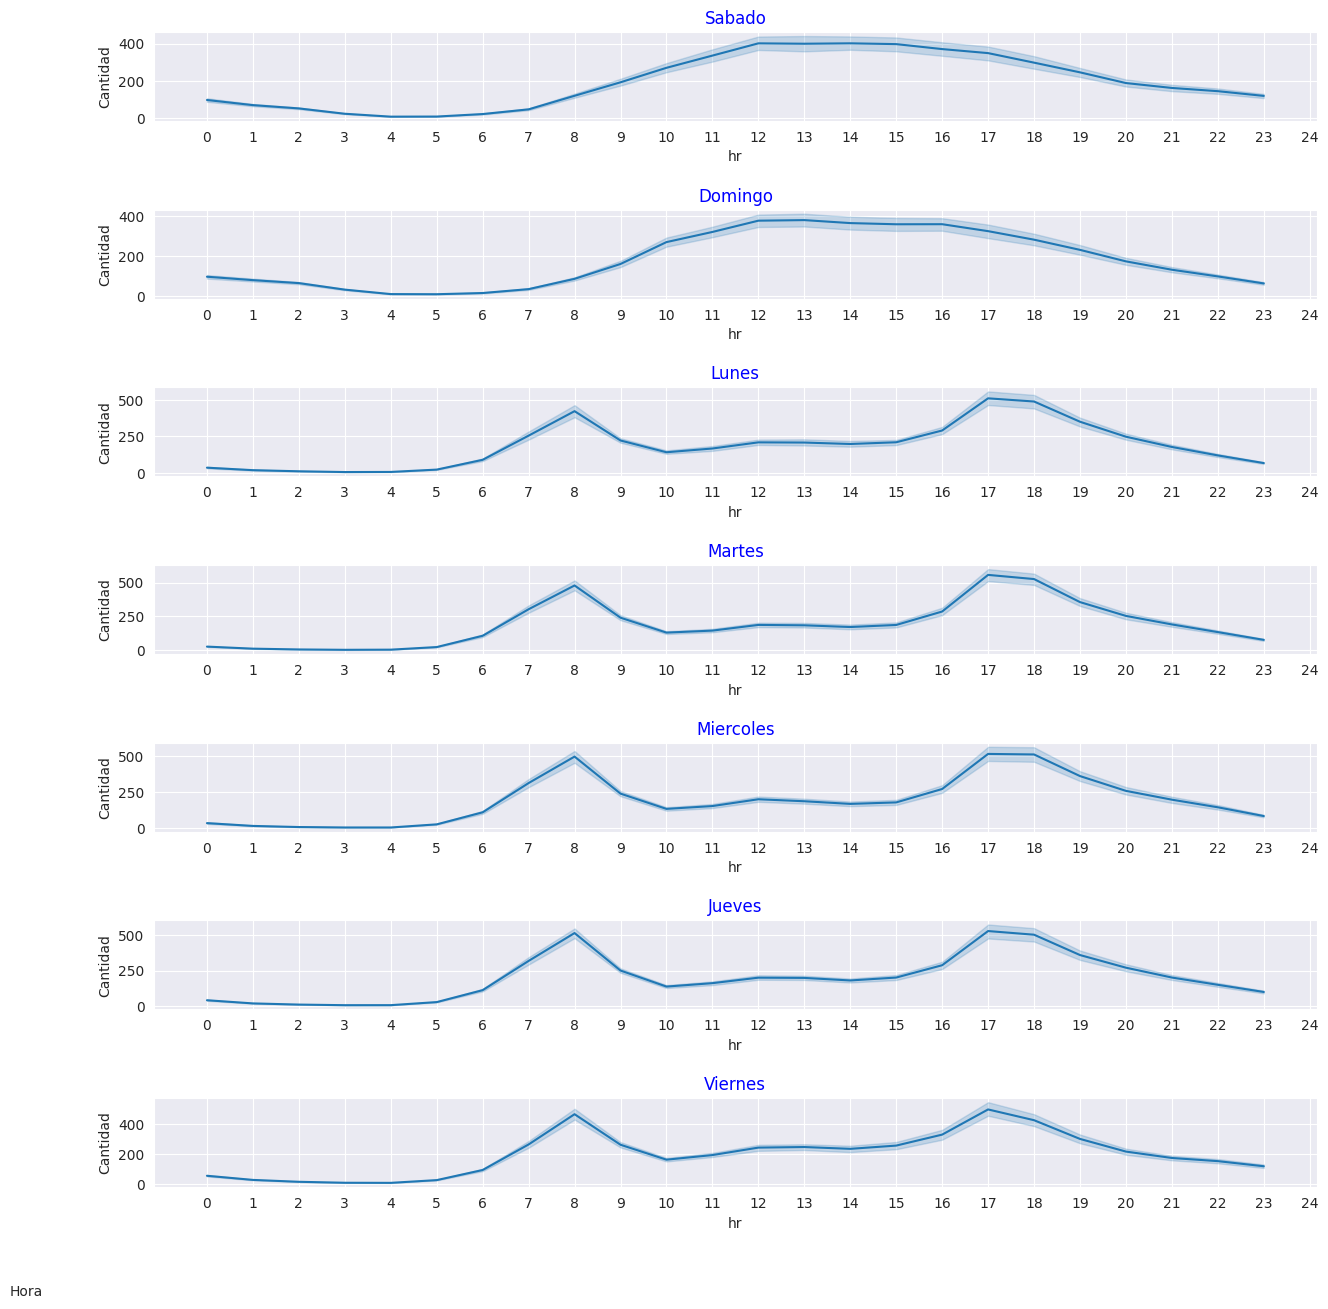

In [120]:
axes[0].set_xticks(range(0, 25))
axes[0].set_xticklabels(range(0, 25))

fig, axes = plt.subplots(7, 1, figsize=(15, 15), sharey=False, sharex=False)

sns.lineplot(ax=axes[0], data=df_copia[df_copia["weekday"]==6], y="cnt", x="hr")
axes[0].set(title="Sabado", ylabel="Cantidad")
axes[0].set_xticks(range(0, 25))
axes[0].set_xticklabels(range(0, 25))

sns.lineplot(ax=axes[1], data=df_copia[df_copia["weekday"]==0], y="cnt", x="hr")
axes[1].set(title="Domingo", ylabel="Cantidad")
axes[1].set_xticks(range(0, 25))
axes[1].set_xticklabels(range(0, 25))

sns.lineplot(ax=axes[2], data=df_copia[df_copia["weekday"]==1], y="cnt", x="hr")
axes[2].set(title="Lunes", ylabel="Cantidad")
axes[2].set_xticks(range(0, 25))
axes[2].set_xticklabels(range(0, 25))

sns.lineplot(ax=axes[3], data=df_copia[df_copia["weekday"]==2], y="cnt", x="hr")
axes[3].set(title="Martes", ylabel="Cantidad")
axes[3].set_xticks(range(0, 25))
axes[3].set_xticklabels(range(0, 25))

sns.lineplot(ax=axes[4], data=df_copia[df_copia["weekday"]==3], y="cnt", x="hr")
axes[4].set(title="Miercoles", ylabel="Cantidad")
axes[4].set_xticks(range(0, 25))
axes[4].set_xticklabels(range(0, 25))

sns.lineplot(ax=axes[5], data=df_copia[df_copia["weekday"]==4], y="cnt", x="hr")
axes[5].set(title="Jueves", ylabel="Cantidad")
axes[5].set_xticks(range(0, 25))
axes[5].set_xticklabels(range(0, 25))

sns.lineplot(ax=axes[6], data=df_copia[df_copia["weekday"]==5], y="cnt", x="hr")
axes[6].set(title="Viernes", ylabel="Cantidad")
axes[6].set_xticks(range(0, 25))
axes[6].set_xticklabels(range(0, 25))

plt.subplots_adjust(hspace=1)
fig.text(0.04, 0.04, 'Hora', ha='center', va='center')
plt.show()




Claramente se ve un comportamiento similar entre los dias de semana y otro entre los fin de semana

In [121]:
lun_a_sab = df_copia[df_copia["weekday"] >0]
lun_a_vie = lun_a_sab[lun_a_sab["weekday"]<6]  
dom = df_copia[df_copia["dia_sem_letra"] =="dom"]
sab= df_copia[df_copia["dia_sem_letra"] =="sab"]
sab_y_dom = pd.concat([dom,sab])

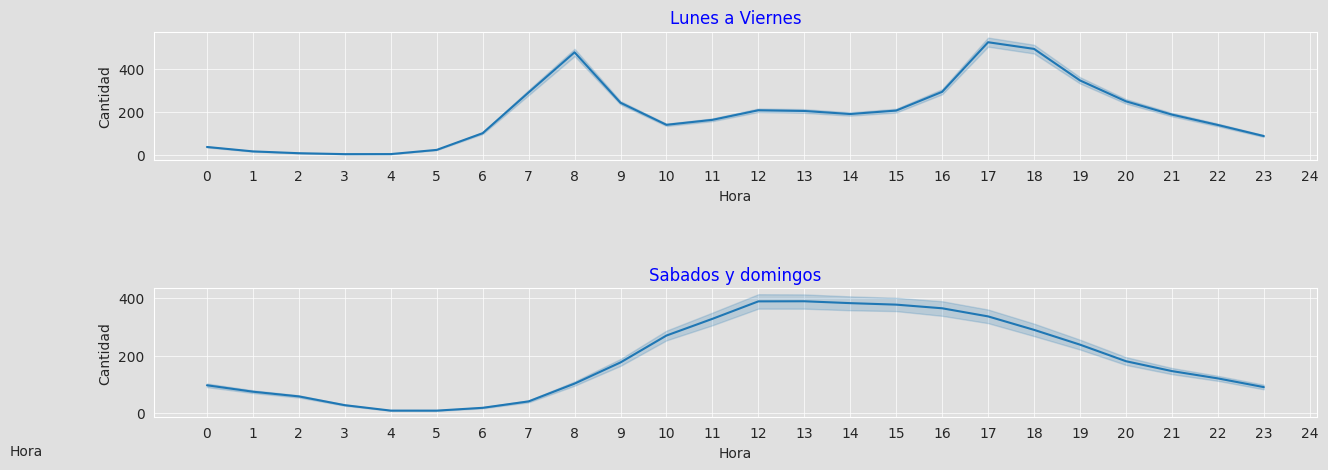

In [122]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5))
sns.lineplot(ax= axes[0], data = lun_a_vie, y="cnt",x="hr").set(xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[1], data = sab_y_dom, y="cnt",x="hr").set(xlabel="Hora",ylabel="Cantidad")

axes[0].grid(color='white', linestyle='-', linewidth=0.5)
axes[1].grid(color='white', linestyle='-', linewidth=0.5)

fig.patch.set_facecolor('#E0E0E0')
axes[0].set_facecolor('#E0E0E0')
axes[1].set_facecolor('#E0E0E0')

axes[0].set_title("Lunes a Viernes")
axes[1].set_title("Sabados y domingos")

axes[0].set_xticks(range(0, 25))
axes[0].set_xticklabels(range(0, 25))
axes[1].set_xticks(range(0, 25))
axes[1].set_xticklabels(range(0, 25))

plt.subplots_adjust(hspace=1)
fig.text(0.04, 0.04, 'Hora', ha='center', va='center')

plt.show()

**Conclusión**: 

Los dias de semana tienen horarios picos (8 y 17 horas), que coincide con la entrada y salida del trabajo

Por otro lado, los sabados y domingos tienen un comportamiento mas estable, siendo entre las 12 y las 18 sus momentos de mas alquiler

En ambos casos, el horario de 0 a 5  con los de menos alquiler


## Vs Categoria de clima

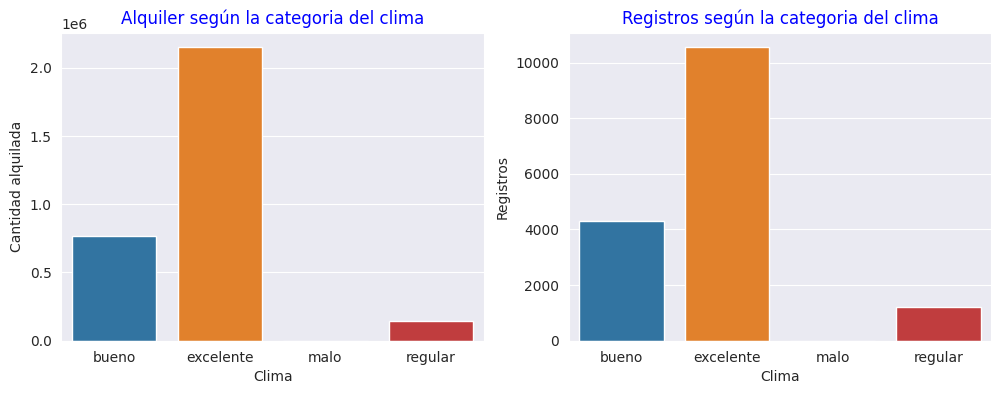

In [123]:
v = 'weathersit'
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
tempo = df_copia.groupby(v)[["cnt"]].sum().reset_index()
tempo2 = df_copia.groupby(v)[["cnt"]].count().reset_index()
ax = sns.barplot(tempo,x=v, y='cnt',ax= axes[0] )
ax1 = sns.barplot(tempo2,x=v, y='cnt',ax= axes[1] )
ax.set_title("Alquiler según la categoria del clima")
ax.set_ylabel ("Cantidad alquilada")
ax.set_xlabel ("Clima")
ax1.set_title("Registros según la categoria del clima")
ax1.set_ylabel ("Registros")
ax1.set_xlabel ("Clima")
plt.show()

In [124]:
df_copia.cnt[df_copia.weathersit == 'malo'].count()

3

**Conclusión**: A mejor clima, mas alquiler

En clima malo solo tiene 3 registos de alquiler

## Vs alquileres casuales y registrados


Alquileres casuales y registrados se desprenden de la variable objetivo

In [125]:
df.casual.sum() +df.registered.sum() == df.cnt.sum()

True

**Conclusión:** La suma de los registrados + los casuales = al total de alquileres

# Pandas profiling report

In [126]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.6 MB 22.9 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 86.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=ad0a61e7789a52b02ffd8ebca8fd89283fe9a1c0409ef6d642800b8823b792d5
  Stored in directory: /tmp/pip-ephem-wheel-ca

In [127]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df_copia)
profile

Output hidden; open in https://colab.research.google.com to view.